<a href="https://colab.research.google.com/github/alinecorreia22/Deep-Learning-do-zero-em-Python/blob/main/Rede_Neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Deep Leaening ***

Rede Neural para reconher digitos

In [44]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [45]:
transform = transforms.ToTensor() #definido a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #carregar a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #cria um buffer para pegar os dados por partes

valset= datasets.MNIST ('./MNIST_data/', download=True, train=False, transform=transform) #carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #Cria um buffer para pegar os dados por parte

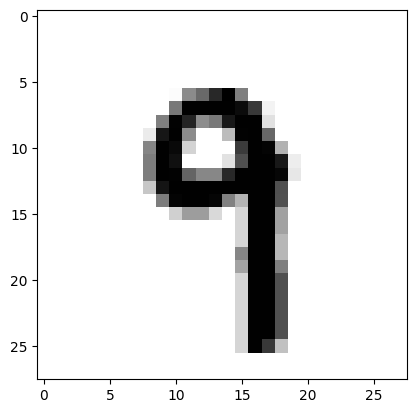

In [46]:
dataiter = iter(trainloader.__iter__())
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [47]:
print(imagens[0].shape) #verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #verificar as dimensões do tensor de cada etiqueta


torch.Size([1, 28, 28])
torch.Size([])


In [48]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) # camada de entrada, 784 neurônios que se ligam a 128
        self.linear2 = nn.Linear(128, 64)    # camada interna 1, 128 neurônios que se ligam a 64
        self.linear3 = nn.Linear(64, 10)     # camada interna 2, 64 neurônios que se ligam a 10

    def forward(self, x):
        x = F.relu(self.linear1(x)) # função de ativação da camada de entrada para a camada interna 1
        x = F.relu(self.linear2(x)) # função de ativação da camada interna 1 para a camada interna 2
        x = self.linear3(x)         # função de ativação da camada interna 2 para a camada de saída
        return F.log_softmax(x, dim=1) # aplicação da função de ativação log_softmax para obter a saída


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from time import time

def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
    inicio = time()

    criterio = nn.NLLLoss()
    EPOCHS = 10
    modelo.train()

    for epoch in range(EPOCHS):
        perda_acumulada = 0

        for i, (imagens, etiquetas) in enumerate(trainloader):
            imagens = imagens.view(imagens.shape[0], -1)
            otimizador.zero_grad()

            output = modelo(imagens.to(device))
            perda_instantanea = criterio(output, etiquetas.to(device))
            perda_instantanea.backward()
            otimizador.step()

            perda_acumulada += perda_instantanea.item()

        print("Epoch {} - Perda resultante: {:.4f}".format(epoch+1, perda_acumulada/len(trainloader)))

    print("\nTempo de treino (em minutos) =", (time()-inicio)/60)

# Exemplo de uso:
# treino(modelo, trainloader, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))



In [50]:
def validacao(modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0

    for imagens, etiquetas in valloader:
        for i, etiqueta_certa in enumerate(etiquetas):
            img = imagens[i].view(1, -1)
            with torch.no_grad():
                logps = modelo(img.to(device))
            ps = torch.exp(logps)
            previsao = torch.argmax(ps, dim=1)
            if etiqueta_certa == previsao.item():
                conta_corretas += 1
            conta_todas += 1

    precisao = conta_corretas * 100 / conta_todas
    print("Total de imagens testadas = ", conta_todas)
    print("\nPrecisão do modelo = {:.2f}%".format(precisao))

# Exemplo de uso:
# validacao(modelo, valloader, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


In [51]:
modelo = Modelo()  # inicializar o modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # modelo rodará na GPU se possível
modelo.to(device)


Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)